# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

In [5]:
# Your code here:
salaries.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:
salaries['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:
salaries.groupby('Department')['Job Titles'].count()

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
# Your code here:
import scipy.stats as sts

In [9]:
valores = salaries['Hourly Rate'].dropna()

In [11]:
intervalo = sts.norm.interval(0.95, loc=valores.mean(), scale=3)
intervalo

(26.908665762660075, 38.6684496699004)

In [12]:
sts.ttest_1samp(intervalo, 30)

Ttest_1sampResult(statistic=0.4742532240857529, pvalue=0.7180800270384947)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [13]:
# Your code here:
anual = salaries['Annual Salary'][salaries['Department']=='POLICE']
anual

0        101442.0
1         94122.0
9         93354.0
11        84054.0
12        87006.0
14        84054.0
22        90024.0
25        48078.0
27        76266.0
28        48078.0
32        80016.0
34        72510.0
38        68616.0
46        90024.0
47        48078.0
50        76266.0
51        48078.0
53        72510.0
55        97440.0
58        72510.0
59        87006.0
60        90024.0
64        84054.0
65        87006.0
66        90024.0
68        72510.0
69        87006.0
70        43800.0
72        76266.0
74        84054.0
           ...   
33117     90024.0
33118     48078.0
33122     96060.0
33124     93354.0
33129     87006.0
33130     90024.0
33131     93354.0
33133    100980.0
33134    127692.0
33140     80016.0
33141     80016.0
33142     91080.0
33146     87006.0
33151     90024.0
33152     84054.0
33153     72510.0
33154     84054.0
33155     90024.0
33160     76266.0
33163     96060.0
33166     76266.0
33170     90024.0
33172     72510.0
33173     87006.0
33176     

In [14]:
intervaloanual = sts.norm.interval(0.95, loc=anual.mean(), scale=3)
intervaloanual

(86480.53461117977, 86492.29439508701)

In [15]:
sts.ttest_1samp(intervaloanual, 86000)

Ttest_1sampResult(statistic=82.7250750473238, pvalue=0.00769523347005279)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [16]:
# Your code here:
deptos = salaries['Department']
horas = salaries['Salary or Hourly']

In [17]:
tablacross=pd.crosstab(deptos, horas, rownames=['deptos'], colnames=['horas'], dropna=False)
tablacross = tablacross.sort_values('Hourly', ascending=False)
hourly = tablacross.head(1)
hourly

horas,Hourly,Salary
deptos,,
STREETS & SAN,1862,336


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [18]:
# Your code here:
workers = salaries[salaries['Department']=='STREETS & SAN']
workers = workers[workers['Salary or Hourly']=='Hourly']
print(workers.isna().sum())
workers['Hourly Rate'].mean()

Name                    0
Job Titles              0
Department              0
Full or Part-Time       0
Salary or Hourly        0
Typical Hours           0
Annual Salary        1862
Hourly Rate             0
dtype: int64


33.72837808807734

In [19]:
intervalwage = sts.norm.interval(0.95, loc=workers['Hourly Rate'].mean(), scale=3)
intervalwage

(27.84848613445718, 39.6082700416975)

In [20]:
hola = sts.ttest_1samp(intervalwage, 35.00)
hola

Ttest_1sampResult(statistic=-0.21626620386106574, pvalue=0.8644088348232599)

In [21]:
import seaborn as sns

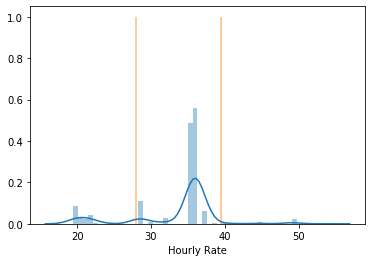

In [22]:
sns.distplot(workers['Hourly Rate'], bins= 50)
sns.distplot(intervalwage, bins= 50, kde=False)

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [23]:
# Your code here:
workers2 = salaries[salaries['Salary or Hourly']=='Hourly']
workers2.describe()
workers2.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68


In [24]:
horas = workers2['Hourly Rate']

In [27]:
internormal=sts.norm.interval(.95, loc=32.78, scale=3)
internormal

(26.900108046379838, 38.65989195362016)

In [28]:
intert = sts.t.interval(.95, horas, loc=horas.mean(), scale=3)
intert

(array([26.52783814, 26.7502244 , 26.70190111, ..., 26.70190111,
        26.75110122, 26.75936373]),
 array([39.04927729, 38.82689104, 38.87521433, ..., 38.87521433,
        38.82601421, 38.8177517 ]))

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [45]:
# Your code here:
chota = salaries[salaries['Department']=='POLICE']
mordida = chota['Annual Salary'].dropna()

In [47]:
Pintert = sts.t.interval(.95, mordida, loc=mordida.mean(), scale=3)
Pintert

(array([86480.53454102, 86480.53453557, 86480.53453494, ...,
        86480.53446315, 86480.53453212, 86480.53453494]),
 array([86492.29446524, 86492.2944707 , 86492.29447132, ...,
        86492.29454312, 86492.29447414, 86492.29447132]))

In [49]:
Pinternormal = sts.norm.interval(.95, loc= mordida.mean(), scale = 3)
Pinternormal

(86480.53461117977, 86492.29439508701)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [52]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest

In [68]:
Hworkers = len(salaries[salaries['Salary or Hourly']=='Hourly'])
Hworkers
todos = len(salaries)
todos

33183

In [71]:
proportions_ztest(Hworkers, todos, value = .25)

(-3.5099964213703005, 0.0004481127249057967)

In [72]:
proportions_ztest(Hworkers, todos, value = .95)

(-301.3384818103434, 0.0)